<!--NAVIGATION-->
< [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb) | [Contents](Index.ipynb) | [Further Resources](04.15-Further-Resources.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Visualization with Seaborn

# 使用Seaborn进行可视化

> Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.
There are several valid complaints about Matplotlib that often come up:

Matplotlib已经证明了自己是一个异常有用和流行的可视化工具，但即使是狂热的用户也承认它有很多不足的地方。下面是一些经常被提出来关于Matplotlib的吐槽：

> - Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.
> - Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
> - Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas ``DataFrame``s. In order to visualize data from a Pandas ``DataFrame``, you must extract each ``Series`` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ``DataFrame`` labels in a plot.

- 在2.0版之前，Matplotlib默认值不总是最好的选择。因为它是基于MATLAB circa 1999的，这一点经常会碰到。
- Matplotlib的API相对来说比较底层，当然可以用来创建复杂的统计图表，但是经常需要撸*很多*冗长的代码。
- Matplotlib比Pandas开发早了超过10年，然而却还不支持直接使用Pandas的`DataFrame`。为了将Pandas的`DataFrame`可视化，你必须将每个`Series`提取出来并组合成合适的格式。如果能够提供直接使用`DataFrame`的标签进行图表可视化的工具会方便的多。

> An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

上述问题可以通过[Seaborn](http://seaborn.pydata.org/)得到解答。Seaborn提供了在Matplotlib之上提供了一套API，包括合理的默认样式和颜色，为通用统计报表设计的简单的高层函数和对Pandas的`DataFrame`的集成。

> To be fair, the Matplotlib team is addressing this: it has recently added the ``plt.style`` tools discussed in [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb), and is starting to handle Pandas data more seamlessly.
The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo.
But for all the reasons just discussed, Seaborn remains an extremely useful addon.

公平的说，Matplotlib团队也在改进这些问题：近期的版本增加了`plt.style`工具（参见[自定义matplotlib：配置和样式单](04.11-Settings-and-Stylesheets.ipynb)），开始让Matplotlib更加无缝地对接Pandas的数据。2.0版本会使用新的默认样式单用来改进目前的样式问题。但是对于我们刚才讨论的问题来说，Seaborn依然是一个很有用的扩展。

## Seaborn Versus Matplotlib

## Seaborn 对比 Matplotlib

> Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors.
We start with the typical imports:

下面的例子是一个简单的随机趋势数据的例子，在Matplotlib使用经典的图表样式和颜色绘制。首先导入需要的包：

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

> Now we create some random walk data:

然后创建随机趋势的数据：

In [2]:
# 创建一些随机数据
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

> And do a simple plot:

绘制简单折线图：

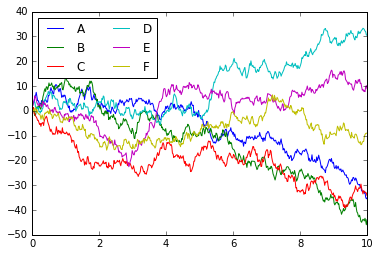

In [3]:
# 使用默认样式绘制图表
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

> Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

虽然结果包含了所有我们希望涵盖的信息，但是它展现的形式并不是特别的美观，和21世纪的数据可视化效果比较起来甚至看起来有一点老土。

> Now let's take a look at how it works with Seaborn.
As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.
We can set the style by calling Seaborn's ``set()`` method.
By convention, Seaborn is imported as ``sns``:

现在让我们看一看Seaborn的结果。正如我们看到的，Seaborn有很多的自己的高层绘图函数，但是它也覆盖了Matplotlib默认参数并且能使用更简单的Matplotlib代码脚本产生复杂的输出结果。我们可以通过调用Seaborn的`set()`函数设置Seaborn的样式。按照管理Seaborn被载入成别名`sns`：

In [4]:
import seaborn as sns
sns.set()

> Now let's rerun the same two lines as before:

现在我们来产生同样的折线图：

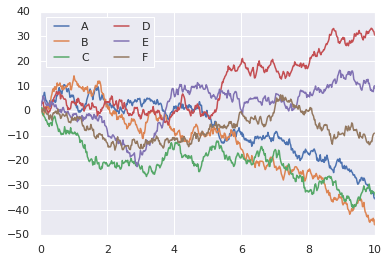

In [5]:
# 所有的代码与上例中的代码一样
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

> Ah, much better!

嗯，好看多了。

## Exploring Seaborn Plots

## 探索 Seaborn 图表

> The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Seaborn的主要设计思想是提供一套高层的接口来创建各种各样的统计数据报表，甚至一些统计模型适应。

> Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

下面让我们看看Seaborn中一些数据集和图表类型。请注意所有下面介绍到的内容*都可以*通过Matplotlib（实际上是Seaborn的底层）实现，但是Seaborn的API用起来方便多了。

### Histograms, KDE, and densities

### 直方图、KDE 和 密度

> Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib:

通常在统计数据可视化当中，所有你想要的可能就是绘制直方图和变量的联合分布。我们已经在Matplotlib中相对直接的展示过这种技巧：

译者注：下面代码将normed参数改为density。

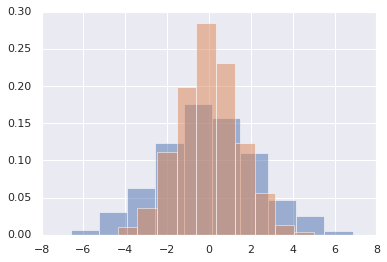

In [6]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

> Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``:

相对于直方图，我们可以使用核密度估计（KDE）来获得一个平滑的估计图，在Seaborn中调用`sns.kdeplot`得到：

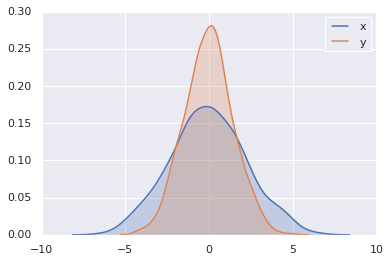

In [7]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

> Histograms and KDE can be combined using ``distplot``:

直方图和KDE可以使用`distplot`组合输出：

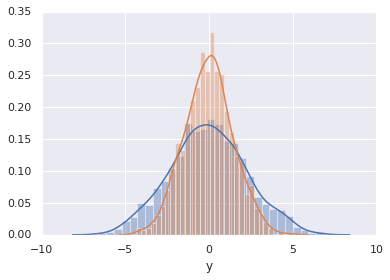

In [8]:
sns.distplot(data['x'])
sns.distplot(data['y']);

> If we pass the full two-dimensional dataset to ``kdeplot``, we will get a two-dimensional visualization of the data:

如果我们将完整的二维数据集传递给`kdeplot`，我们会得到数据的二维可视化图：

译者注：新版Seaborn的`kdeplot`函数不再支持传递二维数据，需要拆分成两个参数，因此下面的代码改为两个参数的调用方式。

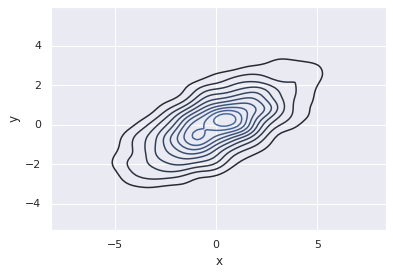

In [9]:
sns.kdeplot(data.x, data.y);

> We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.
For this plot, we'll set the style to a white background:

我们可以使用`sns.jointplot`函数同时绘制联合分布和边缘分布。下例中，我们将图表背景改为白色：

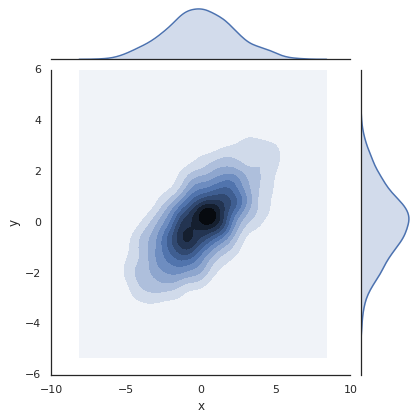

In [10]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

> There are other parameters that can be passed to ``jointplot``—for example, we can use a hexagonally based histogram instead:

我们还可以传递其他的参数到`jointplot`，例如，使用六边形联合分布和直方图：

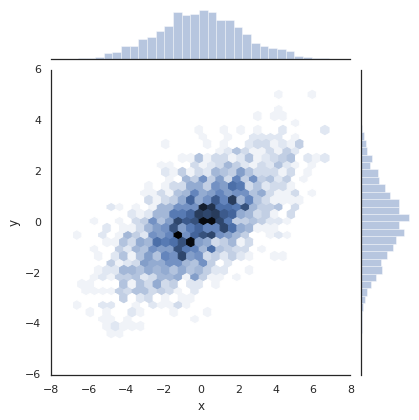

In [11]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### Pair plots

### 散点图矩阵

> When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

当你将联合分布图推广到更多的维度时，你就会获得*散点图矩阵*。这在分析多维数据时是非常有用的，当你希望将所有属性两两组成一对时。

> We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

我们使用著名的鸢尾花数据集来展示散点图矩阵，里面列出了三种不同种鸢尾花的花瓣和花萼的测量值：

In [12]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


> Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

传递样本数据集调用`sns.pairplot`函数可以很容易的展示多维数据的关系：

译者注：下面代码中的size已经过时，修改为height。

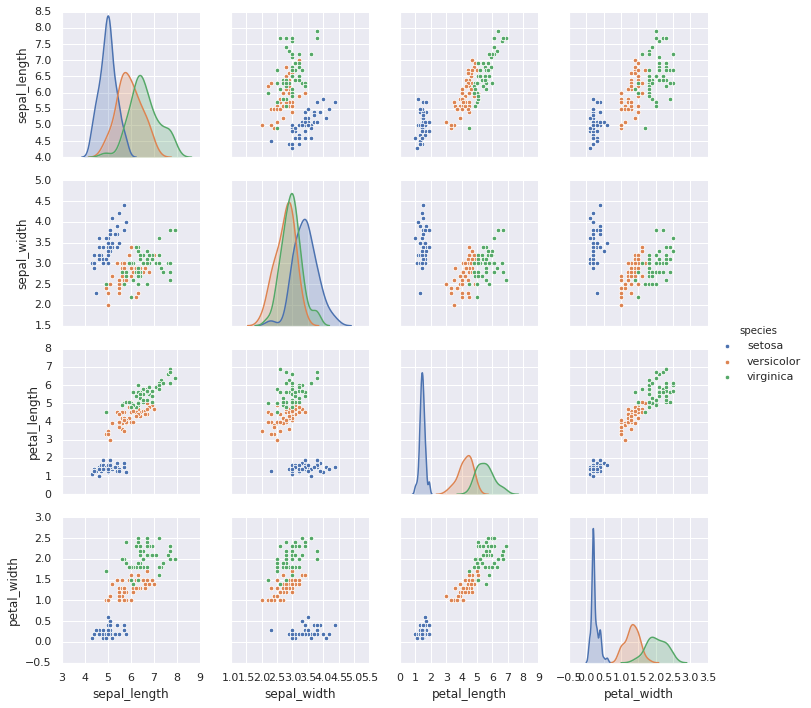

In [13]:
sns.pairplot(iris, hue='species', height=2.5);

### Faceted histograms

### 多面直方图

> Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

有些情况下展示数据的最好方式通过子数据集的直方图。Seaborn的`FacetGrid`将它变得非常简单。我们首先查看一些餐厅工作人员获得小费的数据情况，这是通过不同的指标数据获得的数据集：

译者注：下面代码将直接从data目录中读取tips.csv文件，因为Seaborn已经无法从网上下载tips数据集。

In [14]:
import pandas as pd
tips = pd.read_csv('data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


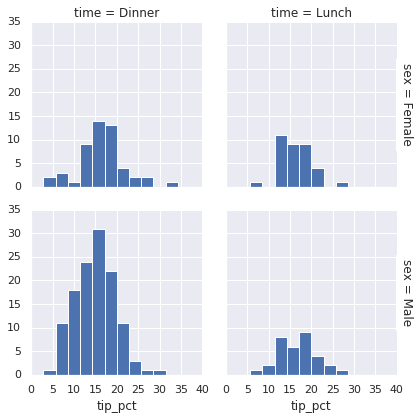

In [15]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots

### 因子图

> Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

因子图也可以很好的展现这个数据。它允许你将一个参数的分布按照另一个参数进行分桶再展示在图表中：

译者注：`factorplot`函数已过时，线面代码更新为了`catplot`函数。

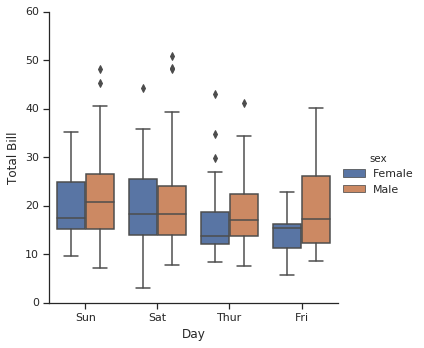

In [16]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

### 联合分布

> Similar to the pairplot we saw earlier, we can use ``sns.jointplot`` to show the joint distribution between different datasets, along with the associated marginal distributions:

类似前面的散点图矩阵，我们可以使用`sns.jointplot`来展示不同数据集中间的联合分布，以及它们的边缘分布情况：

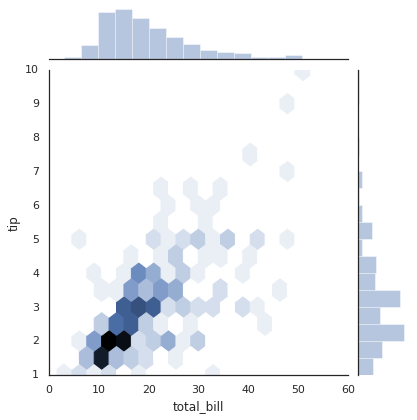

In [17]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

> The joint plot can even do some automatic kernel density estimation and regression:

联合分布图还可以自动进行核密度估计以及回归：

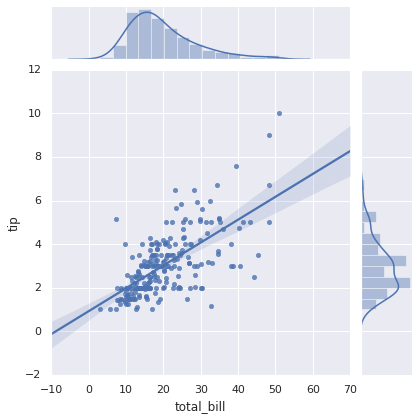

In [18]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### Bar plots

### 柱状图

> Time series can be plotted using ``sns.factorplot``. In the following example, we'll use the Planets data that we first saw in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb):

时间序列可以使用`sns.factorplot`进行图表绘制。在下例中，我们会使用在[聚合与分组](03.08-Aggregation-and-Grouping.ipynb)中使用过的行星数据：

译者注：同样，下面的`factorplot`因为过时被`catplot`取代。

In [19]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


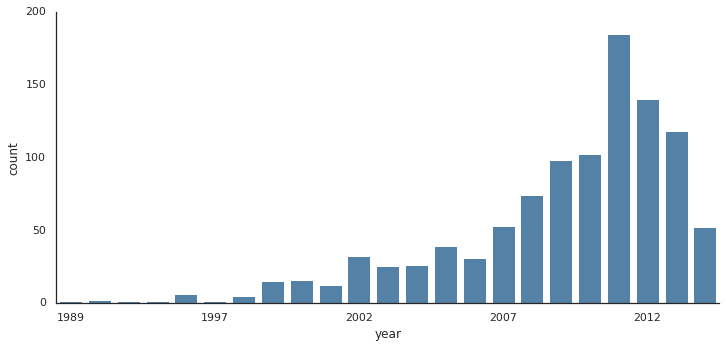

In [20]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

> We can learn more by looking at the *method* of discovery of each of these planets:

我们还可以使用发现这些行星的方法来更加细致的分析这个数据集：

/home/wangy/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


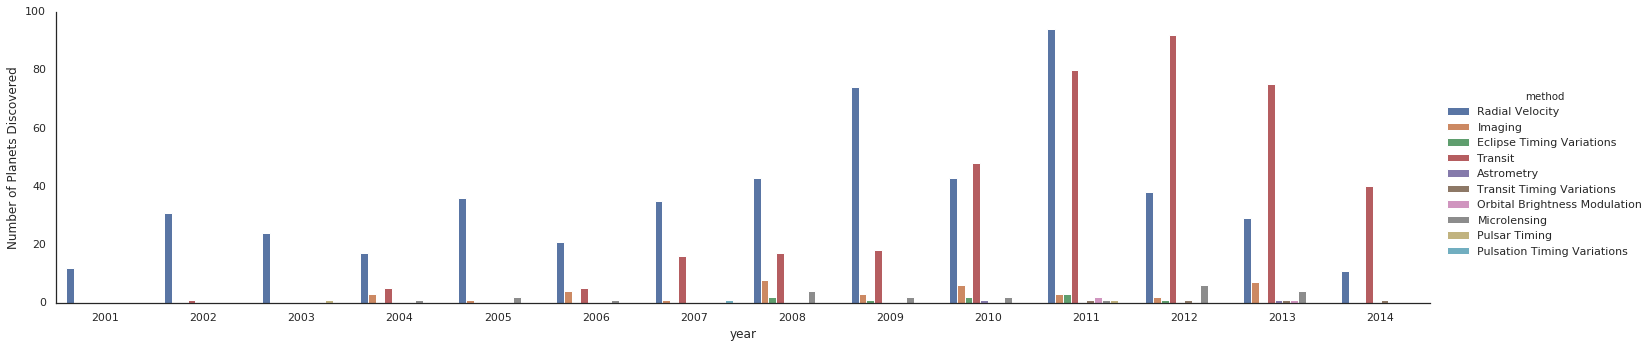

In [21]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

> For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), a [tutorial](http://seaborn.pydata.org/
tutorial.htm), and the [Seaborn gallery](http://seaborn.pydata.org/examples/index.html).

想获得更多使用Seaborn绘制图表的内容，请参考[Seaborn在线文档](http://seaborn.pydata.org/)、[教程](http://seaborn.pydata.org/tutorial.htm)以及[Seaborn图库](http://seaborn.pydata.org/examples/index.html)。

## Example: Exploring Marathon Finishing Times

## 例子：马拉松完成时间分析

> Here we'll look at using Seaborn to help visualize and understand finishing results from a marathon.
I've scraped the data from sources on the Web, aggregated it and removed any identifying information, and put it on GitHub where it can be downloaded
(if you are interested in using Python for web scraping, I would recommend [*Web Scraping with Python*](http://shop.oreilly.com/product/0636920034391.do) by Ryan Mitchell).
We will start by downloading the data from
the Web, and loading it into Pandas:

下面我们来看一下使用Seaborn分析和可视化马拉松完成结果数据的例子。作者已经从网上将数据爬取了下来，组合了这些数据并且删除了身份信息，数据放在GitHub上面提供下载（如果你对使用Python进行网页爬取感兴趣，作者推荐Ryan Mitchell写的[*Python网络爬取*](http://shop.oreilly.com/product/0636920034391.do)）。我们首先下载这个数据，然后使用Pandas将数据载入：

译者注：本仓库notebooks/data目录下带有数据文件，下面的载入语句目录相应修改。

In [22]:
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [23]:
data = pd.read_csv('data/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


> By default, Pandas loaded the time columns as Python strings (type ``object``); we can see this by looking at the ``dtypes`` attribute of the DataFrame:

默认情况下，Pandas将时间列读取载入成Python字符串（Pandas中的`object`类型）；我们可以通过查看DataFrame的dtypes属性知道：

In [24]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

> Let's fix this by providing a converter for the times:

让我们提供一个转换器函数来修正这一列：

In [25]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('data/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [26]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

> That looks much better. For the purpose of our Seaborn plotting utilities, let's next add columns that give the times in seconds:

这样看起来就正常了。为了Seaborn绘图工具能正常工作，为这个数据集添加上两列，将时间转为秒数：

In [27]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


> To get an idea of what the data looks like, we can plot a ``jointplot`` over the data:

要初步查看目前数据的情况，我们可以在数据集上绘制一个联合分布图：

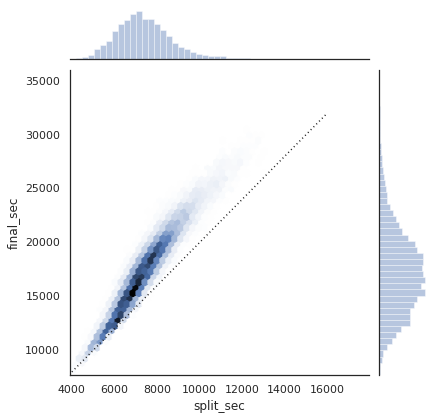

In [28]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

> The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon.
If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

上图中的点线表示，如果一个人在一场马拉松比赛中保持了一个完美的匀速，那么他的成绩将位于这条线上。事实上这个分布都处于这条线上的原因，也是显而易见的，大多数人随着马拉松的进程都会慢下来。如果你有参加过竞技马拉松比赛，你可能就会了解那些不符合这个趋势的选手，即后半程跑的更快的参赛者，被称为后半程加速。

> Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race:

让我们再创建一个列，用来衡量每个选手是后半程加速还是前半程跑的快：

In [29]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


> Where this split difference is less than zero, the person negative-split the race by that fraction.
Let's do a distribution plot of this split fraction:

当`split_frac`列为负数时，该选手是后半程加速。让我们绘制这一列的分布情况：

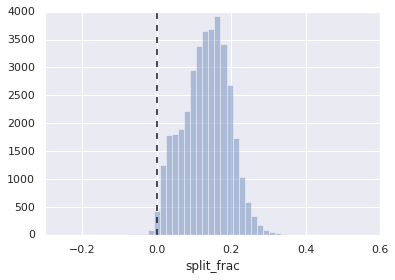

In [30]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [31]:
sum(data.split_frac < 0)

251

> Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.

将近40000名选手中，仅有250人是使用后半程加速完成马拉松比赛的。

> Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a ``pairgrid``, which draws plots of all these correlations:

让我们观察一下这个半程加速分布列和其他列的相关性。你应该也知道应该使用`pairgrid`绘制散点图矩阵了：

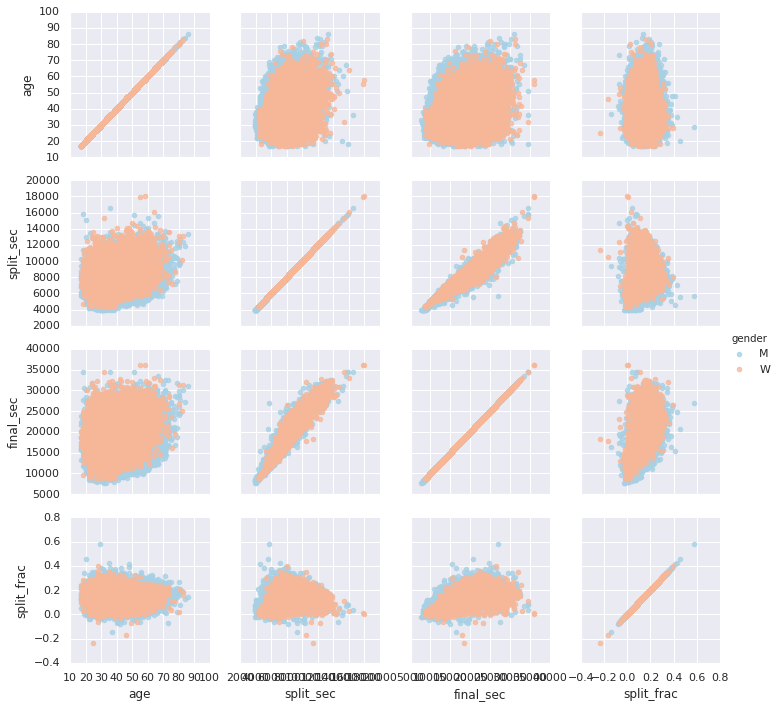

In [32]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

> It looks like the split fraction does not correlate particularly with age, but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time.
(We see here that Seaborn is no panacea for Matplotlib's ills when it comes to plot styles: in particular, the x-axis labels overlap. Because the output is a simple Matplotlib plot, however, the methods in [Customizing Ticks](04.10-Customizing-Ticks.ipynb) can be used to adjust such things if desired.)

从上图得知，半程加速分布似乎与年龄没有特别大的相关性，但是确实和最终完成时间有相关性：成绩越好的选手越善于平均分配前后半程的速度和时间。

> The difference between men and women here is interesting. Let's look at the histogram of split fractions for these two groups:

这里比较有趣的是性别的差异。让我们将这两个组的半程加速分布数据用直方图展示出来：

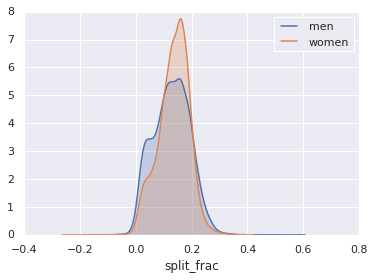

In [33]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

> The interesting thing here is that there are many more men than women who are running close to an even split!
This almost looks like some kind of bimodal distribution among the men and women. Let's see if we can suss-out what's going on by looking at the distributions as a function of age.

上图中有趣的地方是男性前后半程均匀速度和时间的数量比女性多很多。这几乎有点像一个双峰分布的形状了。让我们试着探寻里面的原因。

> A nice way to compare distributions is to use a *violin plot*

比较两个分布的好方法是使用*小提琴图*

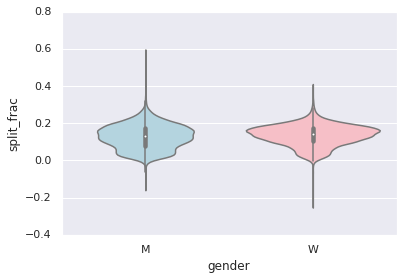

In [34]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

> This is yet another way to compare the distributions between men and women.

这也是一个比较男性和女性分布情况的方式。

> Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decade of age that each person is in:

让我们继续深入，根据年龄数据比较这些小提琴图。我们再创建一个列来表示每个选手的年龄段：

In [35]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10)) # 10-20/20-30 等
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


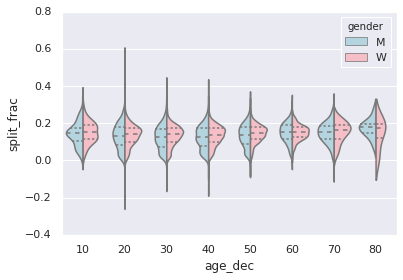

In [36]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

> Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

再看上图，我们可以发现男性和女性分布情况的区别：男性年龄处于20到50之间的时候，其半程平均程度的分布均比同年龄段女性的分布要更密集。

> Also surprisingly, the 80-year-old women seem to outperform *everyone* in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range:

令我们惊讶的是，80岁以上的女性似乎在半程平均程度上优于所有年龄段和性别的分布。这也许是优于这个分布是来自一个很小的数据样本，因为这个年龄段的参加人数是很稀少的：

In [37]:
(data.age > 80).sum()

7

> Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We'll use ``regplot``, which will automatically fit a linear regression to the data:

回到后半程加速的选手身上：它们是谁？是否后半程加速与比赛成绩有相关性？我们可以很容易的绘制这张图。调用`regplot`函数，它能自动的为数据找到一个线性回归预测：

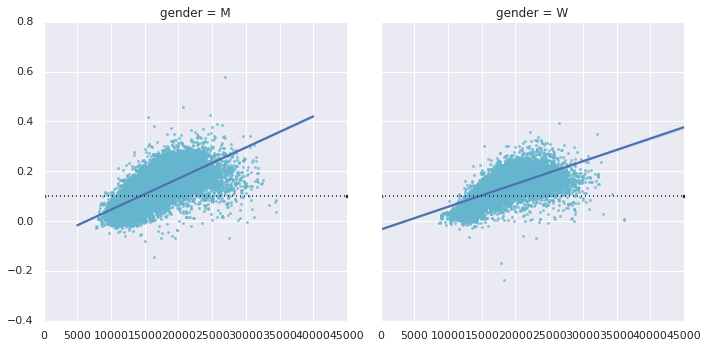

In [38]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

> Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.

很明显了，成绩优秀的选手或者叫精英选手，是那些能在约15000秒或4个小时内完成的人。低于这个成绩的选手很少能在后半程加速完成比赛。

<!--NAVIGATION-->
< [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb) | [Contents](Index.ipynb) | [Further Resources](04.15-Further-Resources.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
